In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Changing the columns name

In [13]:
headers = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors',
           'body-style','drive-wheels','engine-location','wheel-base','lenght','width','height',
           'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system',
           'bore','stroke','compression-ratio','horsepower','peak-rps','city-mpg','highway-mpg','price']

df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rps,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Data types

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  lenght             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Sum of NaN for each column

In [22]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
lenght               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rps             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

How many "?" for each column -> this should be interpretated as NaN

In [39]:
from collections import Counter
count = 0
column = []
for col in df.columns:
    for line in df[col]:
        if line == '?':
            column.append(col)
            count +=1   
print('Numero de "?" em cada coluna')
print(Counter(column))

Numero de "?" em cada coluna
Counter({'normalized-losses': 41, 'bore': 4, 'stroke': 4, 'price': 4, 'num-of-doors': 2, 'horsepower': 2, 'peak-rps': 2})


In [44]:
df = df.replace('?',np.NaN)

In [47]:
df.dropna(subset=['price'], axis=0, inplace=True)

In [53]:
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
lenght                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rps              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [50]:
df.price = df.price.astype(float)

In [52]:
df.nunique()

symboling              6
normalized-losses     51
make                  22
fuel-type              2
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            52
lenght                73
width                 43
height                49
curb-weight          169
engine-type            6
num-of-cylinders       7
engine-size           43
fuel-system            8
bore                  38
stroke                36
compression-ratio     32
horsepower            58
peak-rps              22
city-mpg              29
highway-mpg           30
price                186
dtype: int64

Descrição estatística

In [61]:
numeric_columns = df.describe().columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,201.0,0.840796,1.254802,-2.0,0.0,1.0,2.0,3.0
wheel-base,201.0,98.797015,6.066366,86.6,94.5,97.0,102.4,120.9
lenght,201.0,174.200995,12.322175,141.1,166.8,173.2,183.5,208.1
width,201.0,65.889055,2.101471,60.3,64.1,65.5,66.6,72.0
height,201.0,53.766667,2.447822,47.8,52.0,54.1,55.5,59.8
curb-weight,201.0,2555.666667,517.296727,1488.0,2169.0,2414.0,2926.0,4066.0
engine-size,201.0,126.875622,41.546834,61.0,98.0,120.0,141.0,326.0
compression-ratio,201.0,10.164279,4.004965,7.0,8.6,9.0,9.4,23.0
city-mpg,201.0,25.179104,6.423220,13.0,19.0,24.0,30.0,49.0
highway-mpg,201.0,30.686567,6.815150,16.0,25.0,30.0,34.0,54.0


In [62]:
numeric_columns

Index(['symboling', 'wheel-base', 'lenght', 'width', 'height', 'curb-weight',
       'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

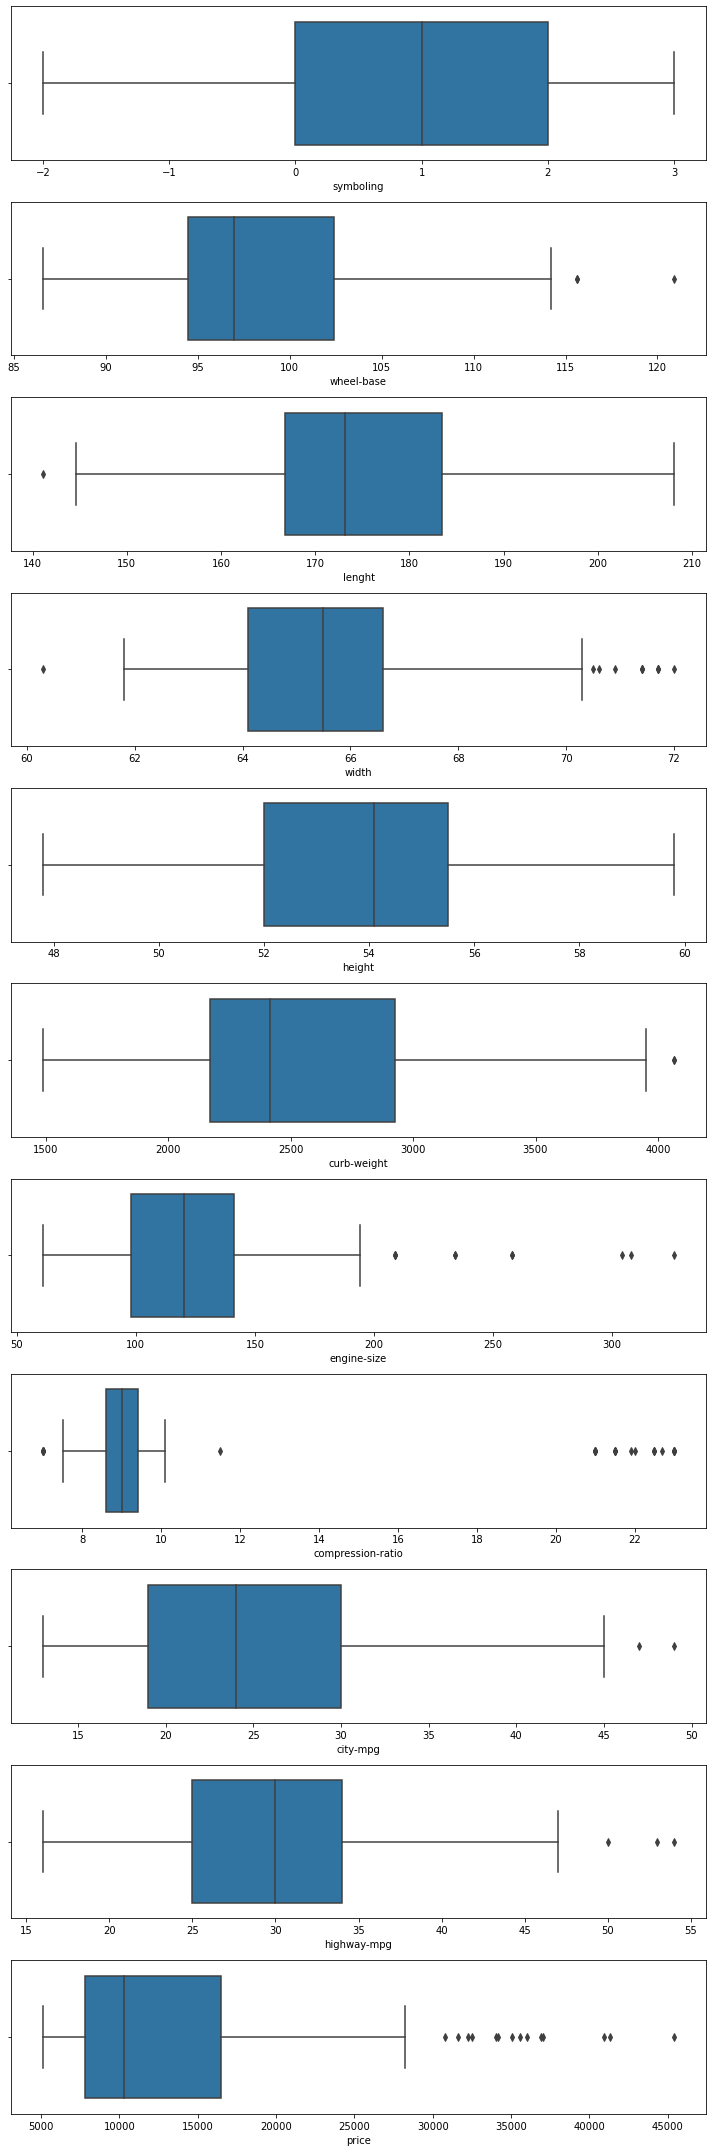

In [74]:
plt.figure(figsize=(10,30))
for n_col, i in zip(numeric_columns, range(1,len(numeric_columns)+1)):
    plt.subplot(len(numeric_columns),1,i)
    sns.boxplot(x=n_col, data=df)
    plt.tight_layout()